In [1]:
import pandas as pd
data=pd.read_csv("/content/SmokeBan.csv")
print(data)

      rownames  ban  age     education afam hispanic  gender smoker
0            1  yes   41            hs   no       no  female    yes
1            2  yes   44  some college   no       no  female    yes
2            3   no   19  some college   no       no  female     no
3            4   no   29            hs   no       no  female    yes
4            5  yes   28  some college   no       no  female     no
...        ...  ...  ...           ...  ...      ...     ...    ...
9995      9996   no   55            hs   no       no    male     no
9996      9997   no   31        master   no       no    male     no
9997      9998  yes   36  some college   no       no  female     no
9998      9999   no   42            hs   no       no  female    yes
9999     10000  yes   35  some college   no       no    male     no

[10000 rows x 8 columns]


In [2]:
data.isna().sum()

rownames     0
ban          0
age          0
education    0
afam         0
hispanic     0
gender       0
smoker       0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data['ban']=b.fit_transform(data['ban'])
data['education']=b.fit_transform(data['education'])
data['afam']=b.fit_transform(data['afam'])
data['hispanic']=b.fit_transform(data['hispanic'])
data['gender']=b.fit_transform(data['gender'])
data['smoker']=b.fit_transform(data['smoker'])
print(data)

      rownames  ban  age  education  afam  hispanic  gender  smoker
0            1    1   41          1     0         0       0       1
1            2    1   44          4     0         0       0       1
2            3    0   19          4     0         0       0       0
3            4    0   29          1     0         0       0       1
4            5    1   28          4     0         0       0       0
...        ...  ...  ...        ...   ...       ...     ...     ...
9995      9996    0   55          1     0         0       1       0
9996      9997    0   31          3     0         0       1       0
9997      9998    1   36          4     0         0       0       0
9998      9999    0   42          1     0         0       0       1
9999     10000    1   35          4     0         0       1       0

[10000 rows x 8 columns]


In [4]:
x=data.drop("smoker",axis=1)
y=data["smoker"]

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain,ytrain)

      rownames  ban  age  education  afam  hispanic  gender
1487      1488    1   27          0     0         0       1
563        564    1   29          4     0         0       1
9326      9327    1   33          2     0         1       1
5691      5692    1   27          0     0         0       0
161        162    0   37          4     0         0       0
...        ...  ...  ...        ...   ...       ...     ...
4917      4918    0   44          1     0         0       1
1988      1989    1   37          4     0         0       1
8976      8977    0   52          1     1         0       1
3176      3177    0   33          3     0         0       1
9942      9943    0   44          1     0         0       0

[9800 rows x 7 columns] 1487    0
563     1
9326    1
5691    0
161     0
       ..
4917    0
1988    0
8976    0
3176    0
9942    0
Name: smoker, Length: 9800, dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
c=br.predict([[1001,0,45,1,0,1,1]])
print(c)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<BarContainer object of 10000 artists>

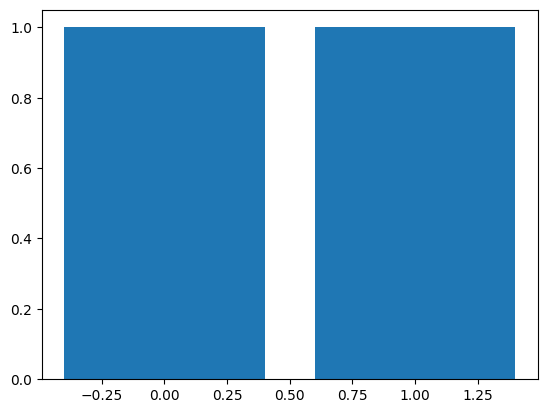

In [8]:
from matplotlib import pyplot as plt
plt.bar(data["gender"],data["smoker"])

In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
print(cm)

[[148   0]
 [ 52   0]]


In [10]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(ytest,ypred)
print(ac)

0.74


In [11]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       148
           1       0.00      0.00      0.00        52

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.55      0.74      0.63       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
